# Decision Tree Classification - Scikit-Learn

## Table of Contents


1. AIM
2. Dataset description
3. Import libraries
4. Import dataset
5. Exploratory data analysis
6. Declare feature vector and target variable
7. Split data into separate training and test set
8. Feature engineering
9. Decision Tree classifier with criterion entropy
10. Decision Tree classifier with criterion gini-index
11. Confusion matrix
12. Classification report
13. Results and conclusion


## 1. AIM


The problem is to predict the safety of the car. In this project, We are going to build a Decision Tree Classifier to predict the safety of the car. I implement Decision Tree Classification with Python and Scikit-Learn. I have used the **Car Evaluation Data Set** for this project, downloaded from the UCI Machine Learning Repository website.


## 2. Dataset description


Dataset url:-

http://archive.ics.uci.edu/ml/datasets/Car+Evaluation

Dataset Description;

- buying : buying price
- maint : price of the maintenance
- doors :   number of doors
- persons : capacity in terms of persons to carry
- lug_boot : 	the size of luggage boot
- safety : estimated safety of the car

and class_Target : evaulation level (unacceptable, acceptable, good, very good);


## 3. Import libraries

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [31]:
import warnings

warnings.filterwarnings('ignore')

## 4. Import dataset

In [32]:
data = 'Datasets/car.data'

df = pd.read_csv(data, header=None)

In [33]:
df.sample(4)

,0,1,2,3,4,5,6
998,med,high,2,more,big,high,acc
1393,low,vhigh,5more,4,big,med,acc
96,vhigh,vhigh,5more,4,big,low,unacc
94,vhigh,vhigh,5more,4,med,med,unacc


## 5. Exploratory data analysis


Now, I will explore the data to gain insights about the data. 

In [34]:
# view dimensions of dataset

df.shape

(1728, 7)

We can see that there are 1728 instances and 7 variables in the data set.

### View top 5 rows of dataset

In [35]:
# preview the dataset

df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


### Rename column names

In [36]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


df.columns = col_names

col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [37]:
# let's again preview the dataset

df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


We can see that the column names are renamed. Now, the columns have meaningful names.

### View summary of dataset

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


### Frequency distribution of values in variables

Now, I will check the frequency counts of categorical variables.

In [39]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


for col in col_names:
    
    print(df[col].value_counts())   


buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
persons
2       576
4       576
more    576
Name: count, dtype: int64
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64
safety
low     576
med     576
high    576
Name: count, dtype: int64
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


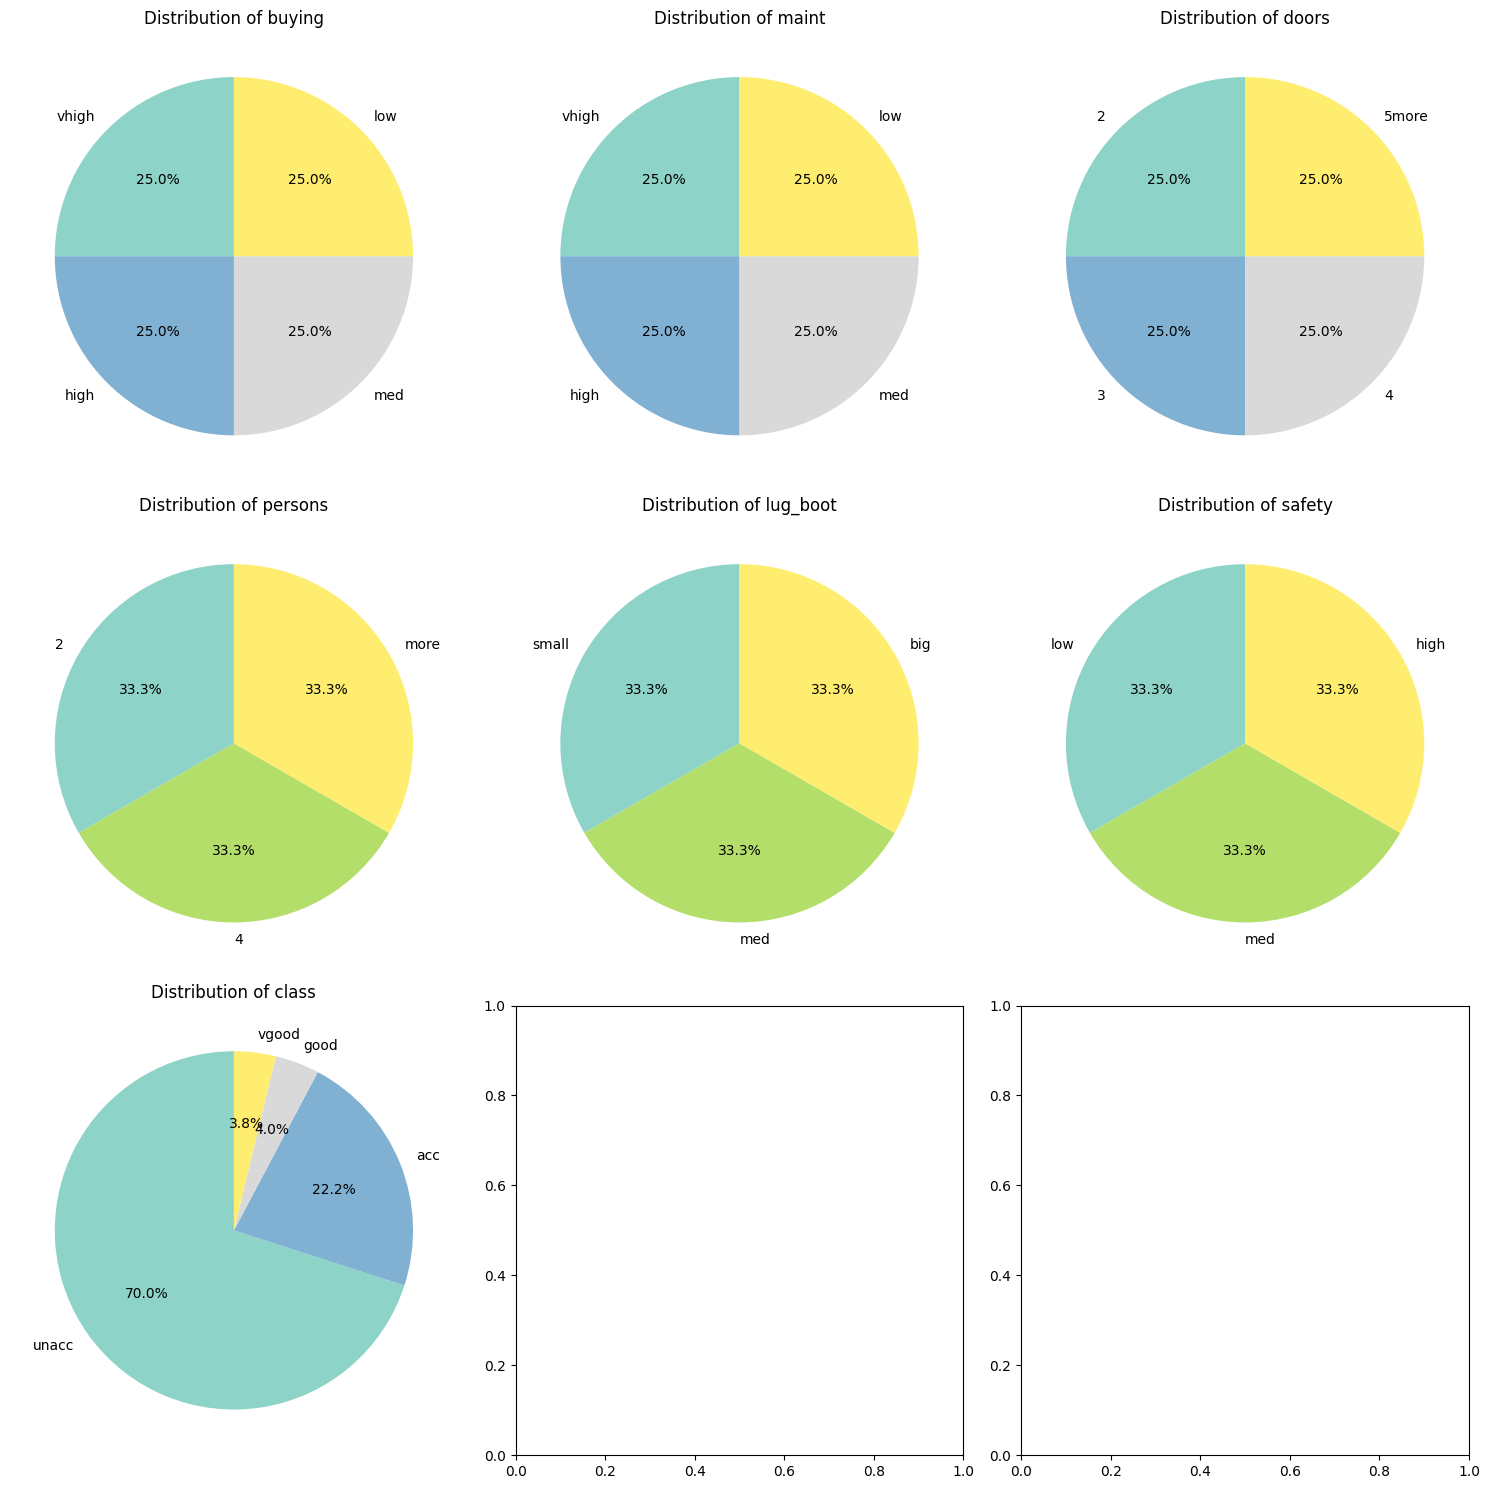

In [40]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))  

# Flatten axes array for easy indexing
axes = axes.flatten()

for i, var in enumerate(col_names):
    df[var].value_counts().plot.pie(
        autopct='%1.1f%%', 
        startangle=90, 
        cmap='Set3', 
        ax=axes[i]
    )
    axes[i].set_title(f'Distribution of {var}')
    axes[i].set_ylabel('')
 
plt.tight_layout()
plt.show()

We can see that the `doors` and `persons` are categorical in nature. So, I will treat them as categorical variables.

### Summary of variables


- There are 7 variables in the dataset. All the variables are of categorical data type.


- These are given by `buying`, `maint`, `doors`, `persons`, `lug_boot`, `safety` and `class`.


- `class` is the target variable.

### Explore `class` variable

In [41]:
df['class'].value_counts()

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

The `class` target variable is ordinal in nature.

### Missing values in variables

In [42]:
# check missing values in variables

df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

## 6. Declare feature vector and target variable

In [43]:
X = df.drop(['class'], axis=1)

y = df['class']

## 7. Split data into separate training and test set

In [44]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)


In [45]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((1157, 6), (571, 6))

## 8. Feature Engineering

### Encode categorical variables


Now, We will encode the categorical variables.

In [47]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,vhigh,vhigh,3,more,med,low
468,high,vhigh,3,4,small,low
155,vhigh,high,3,more,small,high
1721,low,low,5more,more,small,high
1208,med,low,2,more,small,high


We can see that all  the variables are ordinal categorical data type.

In [114]:
# import category encoders

from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

In [53]:
# encode variables with ordinal encoding

category_orders = [
    ['low', 'med', 'high', 'vhigh'],     # buying
    ['low', 'med', 'high', 'vhigh'],     # maint
    ['2', '3', '4', '5more'],            # doors
    ['2', '4', 'more'],                  # persons
    ['small', 'med', 'big'],            # lug_boot
    ['low', 'med', 'high']              # safety
]

encoder = OrdinalEncoder(categories=category_orders,dtype=int)

X_train_encoded = encoder.fit_transform(X_train)

X_test_encoded = encoder.transform(X_test)

In [115]:
le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [117]:
y_train

array([2, 2, 2, ..., 0, 2, 0])

In [122]:
le.classes_

array(['acc', 'good', 'unacc', 'vgood'], dtype=object)

In [54]:
X_train_encoded = pd.DataFrame(X_train_encoded, columns=X_train.columns)
X_test_encoded = pd.DataFrame(X_test_encoded, columns=X_train.columns)

In [55]:
X_train_encoded.head()

,buying,maint,doors,persons,lug_boot,safety
0,3,3,1,2,1,0
1,2,3,1,1,0,0
2,3,2,1,2,0,2
3,0,0,3,2,0,2
4,1,0,0,2,0,2


In [57]:
X_test_encoded.head()

,buying,maint,doors,persons,lug_boot,safety
0,2,2,2,0,1,2
1,1,0,0,1,1,1
2,2,2,3,0,2,1
3,0,2,3,1,1,1
4,1,0,2,2,1,0


We now have training and test set ready for model building. 

## 9. Decision Tree Classifier with criterion entropy

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [118]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [119]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', random_state=0)


# fit the model
clf_en.fit(X_train_encoded, y_train)

y_pred_en = clf_en.predict(X_test_encoded)

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.9650


## 10. Decision Tree Classifier with criterion gini index

In [120]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', random_state=0)


# fit the model
clf_gini.fit(X_train_encoded, y_train)


DecisionTreeClassifier(random_state=0)

### Predict the Test set results with criterion gini index

In [ ]:
y_pred_gini = clf_gini.predict(X_test_encoded)

### Check accuracy score with criterion gini index

In [88]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9597


### Compare the train-set and test-set accuracy


Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [89]:
y_pred_train_gini = clf_gini.predict(X_train_encoded)

y_pred_train_gini

array(['unacc', 'unacc', 'unacc', ..., 'acc', 'unacc', 'acc'],
      dtype=object)

In [90]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 1.0000


### Check for overfitting and underfitting

In [91]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train_encoded, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test_encoded, y_test)))

Training set score: 1.0000
Test set score: 0.9597


Here, the training-set accuracy score is 1.0000 while the test-set accuracy to be 0.9597. These two values are quite comparable. But as we can see training accuracy is 1.0 this indicates overfitting of values. But also test acccuracy is good overall. 

We can handle this overfitting by various methods.. one of them is pruning.


In [ ]:
# ! pip install graphviz

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
from sklearn.tree import plot_tree

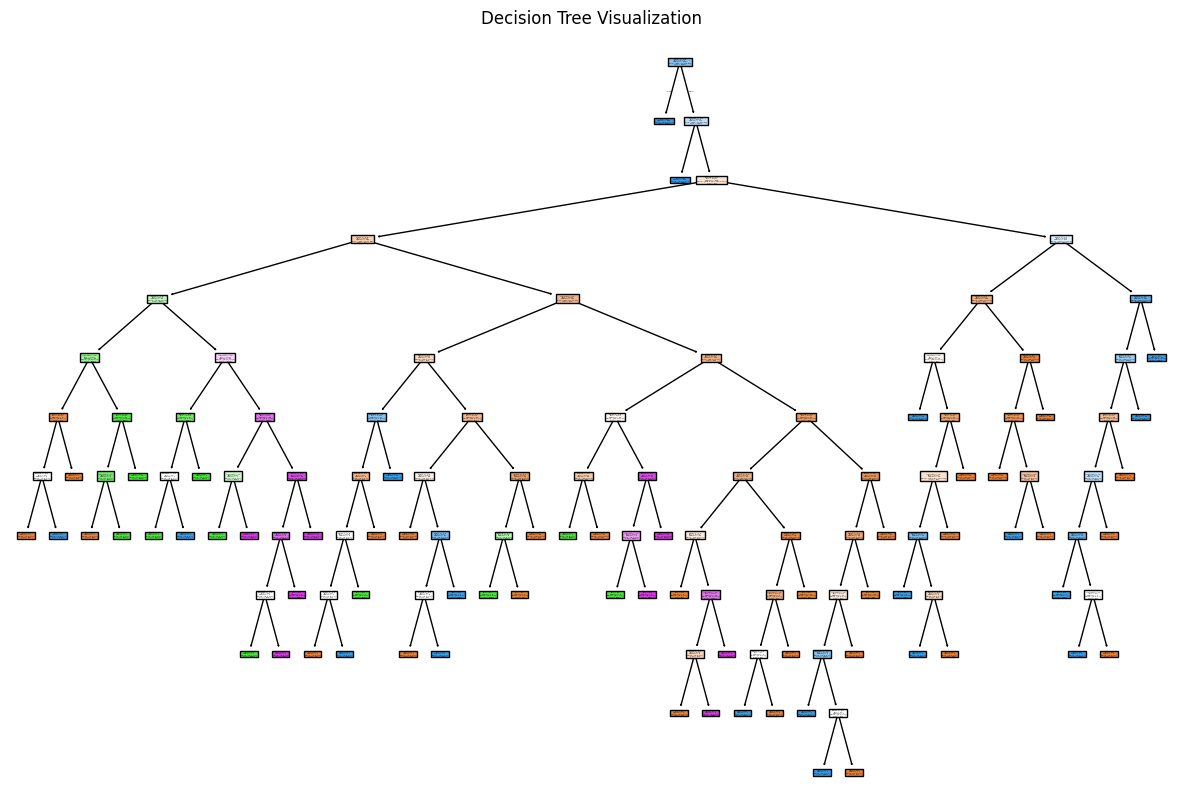

In [ ]:
plt.figure(figsize=(15, 10))
plot_tree(clf_gini, feature_names=X.columns, class_names=le.classes_, filled=True)
plt.title("Decision Tree Visualization")
plt.show()


## 11. Pruning:

Types of pruning: 

1. Pre-pruning:
    - max_depth : Stops growth after a set depth
    - min_samples_split : Requires a minimum number of samples to split
    - min_samples_leaf	: Minimum samples required at leaf
    - max_leaf_nodes : Maximum number of leaf nodes
    - min_impurity_decrease	: Stops if information gain or gini drop is too small

2. Post-pruning:
    - ccp_alpha : Cost-Complexity Pruning Alpha


In [ ]:
# ! pip install graphviz

Defaulting to user installation because normal site-packages is not writeable


In [134]:
from sklearn.tree import plot_tree

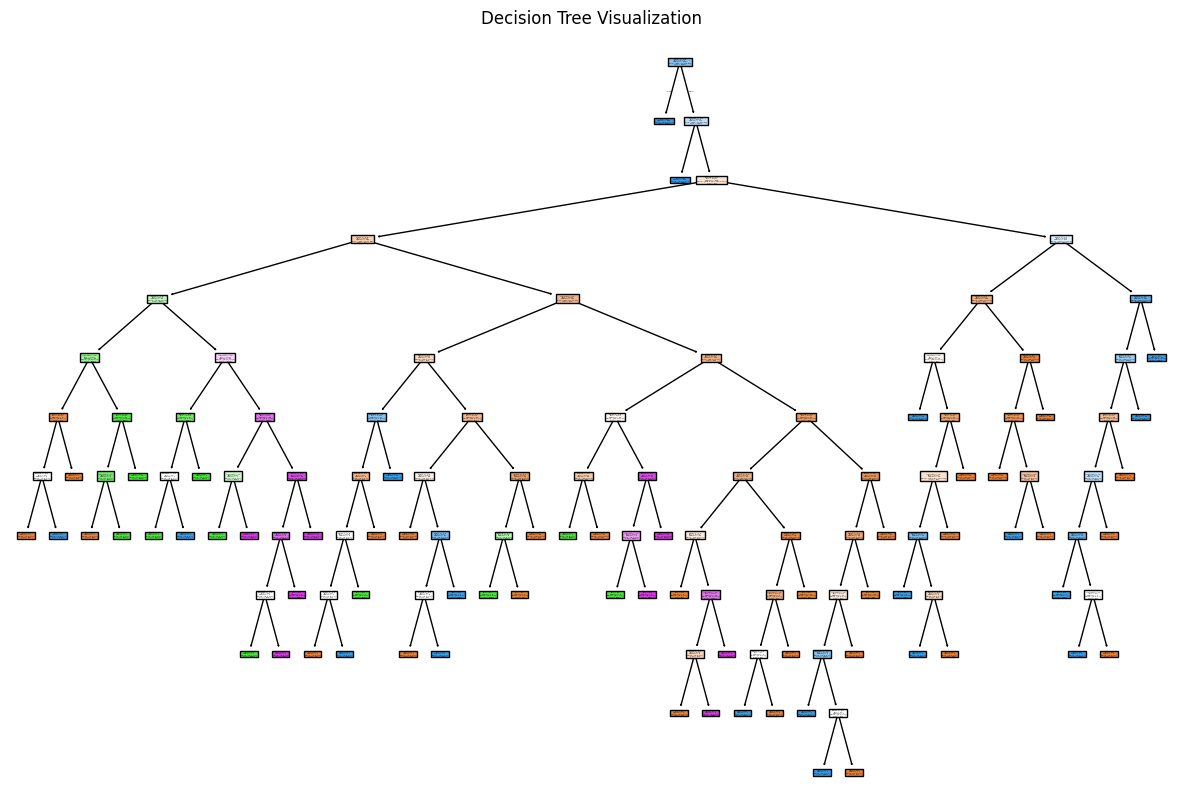

In [135]:
plt.figure(figsize=(15, 10))
plot_tree(clf_gini, feature_names=X.columns, class_names=le.classes_, filled=True)
plt.title("Decision Tree Visualization")
plt.show()


1. max_depth : limit tree depth

In [136]:
# instantiate the DecisionTreeClassifier model with criterion gini and pruning methods:

clf_gini_pr = DecisionTreeClassifier(criterion='gini', random_state=0, max_depth = 3)

# fit the model
clf_gini_pr.fit(X_train_encoded, y_train)

y_pred_en_pr = clf_gini_pr.predict(X_test_encoded)

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en_pr)))

Model accuracy score with criterion entropy: 0.8021


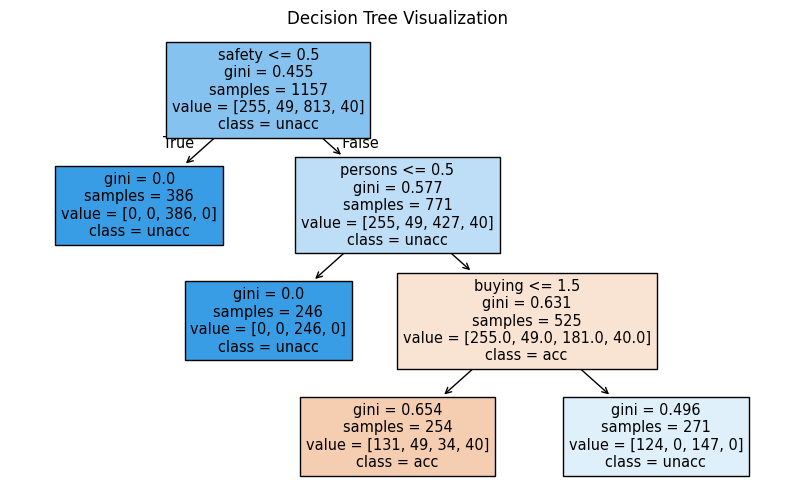

In [141]:
plt.figure(figsize=(10, 6))
plot_tree(clf_gini_pr, feature_names=X.columns, class_names=le.classes_, filled=True)
plt.title("Decision Tree Visualization")
plt.show()

2. min_samples_split : minimum samples required to split an internal node

In [153]:
# instantiate the DecisionTreeClassifier model with criterion gini and pruning methods:

clf_en_pr = DecisionTreeClassifier(criterion='entropy', random_state=0, min_samples_split = 30)

# fit the model
clf_en_pr.fit(X_train_encoded, y_train)

y_pred_en_pr = clf_en_pr.predict(X_test_encoded)

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en_pr)))

Model accuracy score with criterion entropy: 0.9264


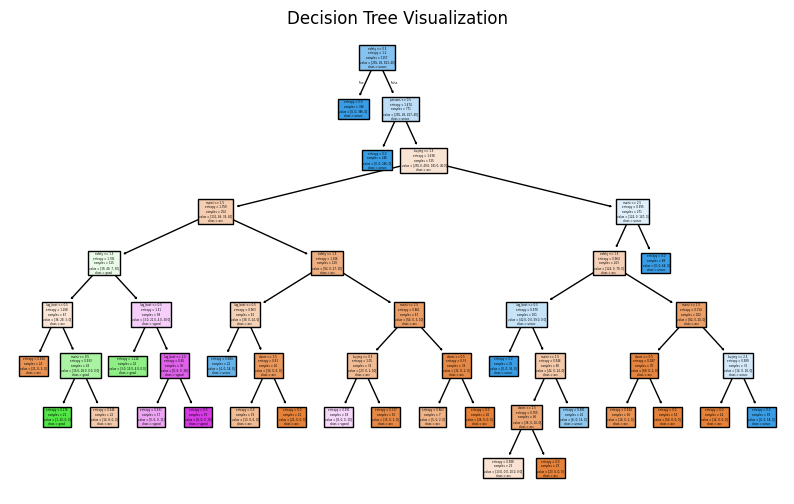

In [154]:
plt.figure(figsize=(10, 6))
plot_tree(clf_en_pr, feature_names=X.columns, class_names=le.classes_, filled=True)
plt.title("Decision Tree Visualization")
plt.show()

3. min_samples_leaf : minimum samples required at a leaf node

In [155]:
# instantiate the DecisionTreeClassifier model with criterion gini and pruning methods:

clf_gini_pr = DecisionTreeClassifier(criterion='gini', random_state=0, min_samples_leaf = 20)

# fit the model
clf_gini_pr.fit(X_train_encoded, y_train)

y_pred_en_pr = clf_gini_pr.predict(X_test_encoded)

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en_pr)))

Model accuracy score with criterion entropy: 0.8984


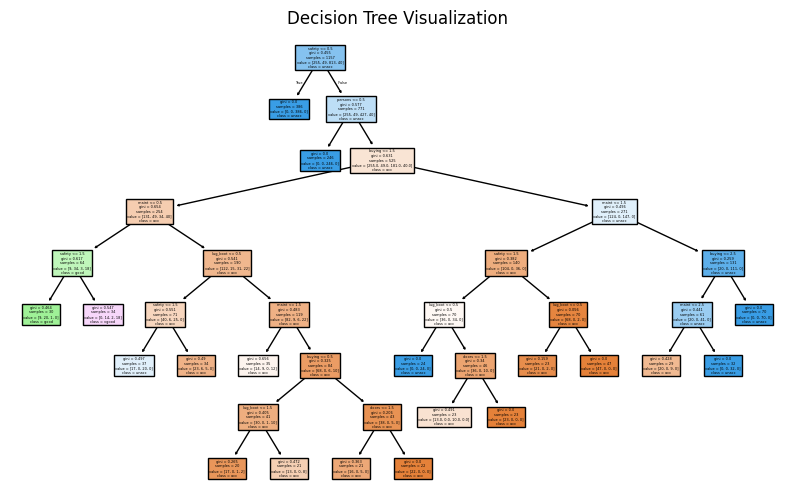

In [156]:
plt.figure(figsize=(10, 6))
plot_tree(clf_gini_pr, feature_names=X.columns, class_names=le.classes_, filled=True)
plt.title("Decision Tree Visualization")
plt.show()

4. min_impurity_decrease : minimum gini/entropy gain required to make a split

In [157]:
# instantiate the DecisionTreeClassifier model with criterion gini and pruning methods:

clf_gini_pr = DecisionTreeClassifier(criterion='gini', random_state=0, min_impurity_decrease = 0.02)

# fit the model
clf_gini_pr.fit(X_train_encoded, y_train)

y_pred_en_pr = clf_gini_pr.predict(X_test_encoded)

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en_pr)))

Model accuracy score with criterion entropy: 0.8529


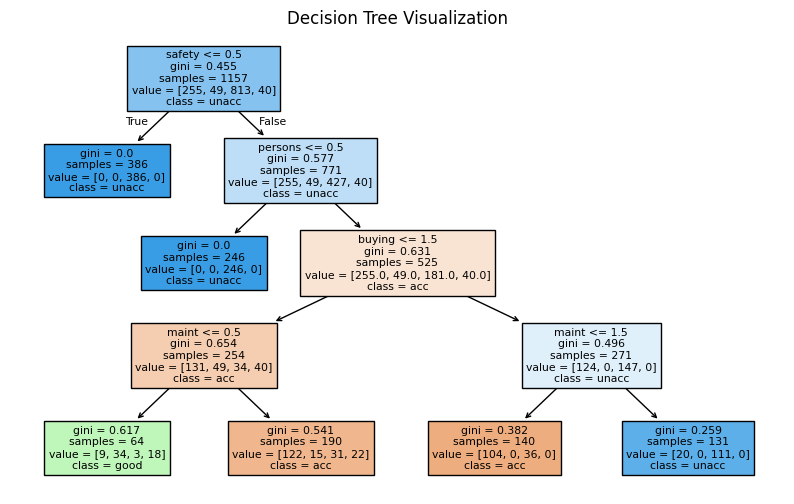

In [158]:
plt.figure(figsize=(10, 6))
plot_tree(clf_gini_pr, feature_names=X.columns, class_names=le.classes_, filled=True)
plt.title("Decision Tree Visualization")
plt.show()

## 11. Confusion matrix

In [138]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)


Confusion matrix

 [[ 73   0  56   0]
 [ 20   0   0   0]
 [ 12   0 385   0]
 [ 25   0   0   0]]


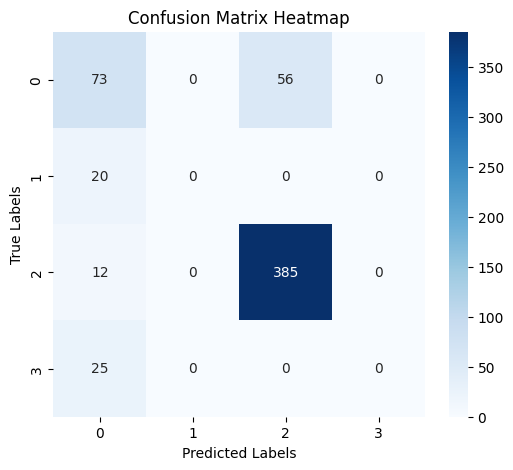

In [139]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## 12. Classification Report


In [140]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.56      0.57      0.56       129
           1       0.00      0.00      0.00        20
           2       0.87      0.97      0.92       397
           3       0.00      0.00      0.00        25

    accuracy                           0.80       571
   macro avg       0.36      0.38      0.37       571
weighted avg       0.73      0.80      0.77       571



## 13. Results and conclusion


1.	In this project, I build a Decision-Tree Classifier model to predict the safety of the car. I build two models, one with criterion `gini index` and another one with criterion `entropy`. The model yields a very good performance as indicated by the model accuracy in both the cases which was found to be 0.8021.

2.	In the model with criterion `gini index`, the training-set accuracy score is 1.000 while the test-set accuracy to be 0.95. These two values are quite comparable. So, there is no sign of overfitting.

3.	Similarly, in the model with criterion `entropy`, the training-set accuracy score is 1.00 while the test-set accuracy to be 0.96.We get the same values as in the case with criterion `gini`. So, there is no sign of overfitting.

4.	In both the cases, the training-set is 1.00 and test-set accuracy score is almost same. It may happen because of small dataset.

5.	The confusion matrix and classification report yields very good model performance.

6. We also applied pruning using various pre-purning methods, which results in decrement of accuracy. (generally used to avoid overfitting)